### XGBoost_Pred_16OUT2020_AD_dfa_2_K80

## bibliotecas a serem usadas

In [84]:
import plotly_express as px
# biblioteca nova, para visualização com diferentes formas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms

In [85]:
# parâmetros dos gráficos para o arquivo
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

### arquivo_dados_formatados_agrupados_recebido em 15OUT

In [86]:
df=pd.read_csv('d_f_a_2.csv',encoding = "ISO-8859-1", sep=";", low_memory=False, nrows=1000000)
# somente 100 mil linhas, tempo computação adequável

In [87]:
df.head(3)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  renda_media_mora  \
0    290010      8301           1        J04     0.000121          0.103943   
1    290010      8301           1        J06     0.000121          0.103943   
2    290010      8301           5        J15     0.000602          0.103943   

   SITU1_entorno  SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
0       0.463481            0.0            0.0            0.0       0.083528   
1       0.463481            0.0            0.0            0.0       0.083528   
2       0.463481            0.0            0.0            0.0       0.083528   

   SITU6_entorno  SITU7_entorno  SITU8_entorno  V001_entorno  \
0            0.0            0.0       0.452991           1.0   
1            0.0            0.0       0.452991           1.0   
2            0.0            0.0       0.452991           1.0   

   existe_pav_entorno  n_existe_pav_entorno  existe_calc_entorno  \
0            0.371018              0.090132             0.293706   
1            0.371018              0.090132             0.293706   
2            0.371018              0.090132             0.293706   

   n_existe_calc_entorno  existe_mfio_entorno  n_existe_mfio_entorno  \
0               0.167444             0.379953               0.081197   
1               0.167444             0.379953               0.081197   
2               0.167444             0.379953               0.081197   

   existe_buero_entorno  n_existe_buero_entorno  existe_arbo_entorno  \
0              0.015151                0.445998             0.348873   
1              0.015151                0.445998             0.348873   
2              0.015151                0.445998             0.348873   

   n_existe_arbo_entorno  existe_esgoto_entorno  n_existe_esgoto_entorno  \
0               0.112277                 0.0777                  0.38345   
1               0.112277                 0.0777                  0.38345   
2               0.112277                 0.0777                  0.38345   

   existe_lixo_entorno  n_existe_lixo_entorno  V001_domicilio01  \
0             0.021756               0.439394               1.0   
1             0.021756               0.439394               1.0   
2             0.021756               0.439394               1.0   

   V012_domicilio01  V013_domicilio01  V014_domicilio01  V015_domicilio01  \
0          0.912505          0.001161          0.009679          0.073171   
1          0.912505          0.001161          0.009679          0.073171   
2          0.912505          0.001161          0.009679          0.073171   

   V016_domicilio01  V017_domicilio01  V018_domicilio01  V019_domicilio01  \
0          0.963995          0.096012          0.033682          0.826171   
1          0.963995          0.096012          0.033682          0.826171   
2          0.963995          0.096012          0.033682          0.826171   

   V020_domicilio01  V021_domicilio01  V022_domicilio01  V023_domicilio01  \
0          0.003872          0.000387          0.003872           0.03252   
1          0.003872          0.000387          0.003872           0.03252   
2          0.003872          0.000387          0.003872           0.03252   

   V024_domicilio01  V034_domicilio01  V035_domicilio01  V036_domicilio01  \
0          0.957027          0.039489          0.546651          0.538521   
1          0.957027          0.039489          0.546651          0.538521   
2          0.957027          0.039489          0.546651          0.538521   

   V037_domicilio01  V038_domicilio01  V039_domicilio01  V040_domicilio01  \
0           0.00813          0.381339          0.016647          0.039876   
1           0.00813          0.381339          0.016647          0.039876   
2           0.00813          0.381339          0.016647          0.039876   

   V041_domicilio01  V042_domicilio01  V043_domicilio01  V046_domicilio01  \
0               0.0          0.012002          0.966705      

In [88]:
df.fillna(0.0001)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  \
0         290010      8301           1        J04     0.000121   
1         290010      8301           1        J06     0.000121   
2         290010      8301           5        J15     0.000602   
3         290010      8301          12        J18     0.001446   
4         290010      8301           1        J34     0.000121   
...          ...       ...         ...        ...          ...   
140623    432380     12396           5        K85     0.000403   
140624    432380     12396          14        K86     0.001129   
140625    432380     12396           2        K90     0.000161   
140626    432380     12396           1        K91     0.000081   
140627    432380     12396           7        K92     0.000565   

        renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
0               0.103943       0.463481            0.0            0.0   
1               0.103943       0.463481            0.0            0.0   
2               0.103943       0.463481            0.0            0.0   
3               0.103943       0.463481            0.0            0.0   
4               0.103943       0.463481            0.0            0.0   
...                  ...            ...            ...            ...   
140623          0.400141       0.995594            0.0            0.0   
140624          0.400141       0.995594            0.0            0.0   
140625          0.400141       0.995594            0.0            0.0   
140626          0.400141       0.995594            0.0            0.0   
140627          0.400141       0.995594            0.0            0.0   

        SITU4_entorno  SITU5_entorno  SITU6_entorno  SITU7_entorno  \
0                 0.0       0.083528            0.0            0.0   
1                 0.0       0.083528            0.0            0.0   
2                 0.0       0.083528            0.0            0.0   
3                 0.0       0.083528            0.0            0.0   
4                 0.0       0.083528            0.0            0.0   
...               ...            ...            ...            ...   
140623            0.0       0.000000            0.0            0.0   
140624            0.0       0.000000            0.0            0.0   
140625            0.0       0.000000            0.0            0.0   
140626            0.0       0.000000            0.0            0.0   
140627            0.0       0.000000            0.0            0.0   

        SITU8_entorno  V001_entorno  existe_pav_entorno  n_existe_pav_entorno  \
0            0.452991           1.0            0.371018              0.090132   
1            0.452991           1.0            0.371018              0.090132   
2            0.452991           1.0            0.371018              0.090132   
3            0.452991           1.0            0.371018              0.090132   
4            0.452991           1.0            0.371018              0.090132   
...               ...           ...                 ...                   ...   
140623       0.004406           1.0            0.914463              0.079575   
140624       0.004406           1.0            0.914463              0.079575   
140625       0.004406           1.0            0.914463              0.079575   
140626       0.004406           1.0            0.914463              0.079575   
140627       0.004406           1.0            0.914463              0.079575   

        existe_calc_entorno  n_existe_calc_entorno  existe_mfio_entorno  \
0                  0.293706               0.167444             0.379953   
1                  0.293706               0.167444             0.379953   
2                  0.293706               0.167444             0.379953   
3                  0.293706               0.167444             0.379953   
4                  0.293706               0.167444             0.379953   
...                     ...                    ...                  ...   

In [89]:
df.isnull().sum()

cod_muni            0
qtd_mora            0
incidencia          0
diag_princ          0
prevalencia         0
                   ..
V037_domicilio02    0
V038_domicilio02    0
V041_domicilio02    0
V045_domicilio02    0
V089_domicilio02    0
Length: 83, dtype: int64

In [90]:
df.sample(2)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  \
37406     312352      7416           4        K63     0.000539   
124779    431036      3012          16        K65     0.005312   

        renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
37406           0.153259       0.515539            0.0       0.000000   
124779          0.497911       0.417293            0.0       0.110902   

        SITU4_entorno  SITU5_entorno  SITU6_entorno  SITU7_entorno  \
37406             0.0       0.019196            0.0            0.0   
124779            0.0       0.000000            0.0            0.0   

        SITU8_entorno  V001_entorno  existe_pav_entorno  n_existe_pav_entorno  \
37406        0.465265           1.0            0.426874              0.088208   
124779       0.471805           1.0            0.474624              0.053571   

        existe_calc_entorno  n_existe_calc_entorno  existe_mfio_entorno  \
37406              0.180530               0.334552             0.424132   
124779             0.266917               0.261278             0.452068   

        n_existe_mfio_entorno  existe_buero_entorno  n_existe_buero_entorno  \
37406                0.090951              0.337294                0.177788   
124779               0.076128              0.450188                0.078008   

        existe_arbo_entorno  n_existe_arbo_entorno  existe_esgoto_entorno  \
37406              0.281993               0.233090               0.004113   
124779             0.399436               0.128759               0.006579   

        n_existe_esgoto_entorno  existe_lixo_entorno  n_existe_lixo_entorno  \
37406                  0.510969             0.004113               0.510969   
124779                 0.521617             0.000000               0.528196   

        V001_domicilio01  V012_domicilio01  V013_domicilio01  \
37406                1.0          0.430657          0.415146   
124779               1.0          0.794419          0.160000   

        V014_domicilio01  V015_domicilio01  V016_domicilio01  \
37406            0.00000          0.152372          0.994069   
124779           0.00093          0.034419          0.985116   

        V017_domicilio01  V018_domicilio01  V019_domicilio01  \
37406           0.347628          0.032390          0.064325   
124779          0.015814          0.278139          0.669767   

        V020_domicilio01  V021_domicilio01  V022_domicilio01  \
37406           0.037409          0.468522          0.043796   
124779          0.012093          0.000930          0.008372   

        V023_domicilio01  V024_domicilio01  V034_domicilio01  \
37406           0.004106          0.988139          0.010037   
124779          0.004651          0.973954          0.015814   

        V035_domicilio01  V036_domicilio01  V037_domicilio01  \
37406           0.522810          0.306569          0.216241   
124779          0.952558          0.952558          0.000000   

        V038_domicilio01  V039_domicilio01  V040_domicilio01  \
37406           0.401916          0.014599          0.037865   
124779          0.032558          0.002791          0.000930   

        V041_domicilio01  V042_domicilio01  V043_domicilio01  \
37406           0.003193          0.017792          0.995894   
124779          0.000000          0.000930          0.986977   

        V046_domicilio01  V060_domicilio01  V061_domicilio01  \
37406           0.002281          0.062500          0.077099   
124779          0.002791          0.125581          0.058605   

        V001_domicilio02  V012_domicilio02  V013_domicilio02  \
37406                1.0          0.397144          0.439445   
124779               1.0          0.795567          0.166722   

        V014_domicilio02  V015_domicilio02  V016_domicilio02  \
37406           0.000000          0.162468          0.996093   
124779          0.000992          0.033080          0.993384   

        V017_domicilio02  V018_domicilio02  V019_domicilio02  \
37406        

In [91]:
# avaliação da frequência de cada município
df.cod_muni.value_counts()

350950    116
292740    116
310620    116
352590    115
354870    113
         ... 
291790     18
316700     17
317047     14
312247     14
312620     12
Name: cod_muni, Length: 2410, dtype: int64

In [92]:
# avaliação da frequência_doenças
df.diag_princ.value_counts()

K40    2409
J18    2407
K80    2406
J44    2399
K81    2398
       ... 
K03      34
J70      25
J68      14
J99      12
J92       6
Name: diag_princ, Length: 122, dtype: int64

### 3a_doença mais frequente = K80

In [93]:
# separação na doença mais frequente desse arquivo = K40
temp = np.where(df['diag_princ'].isin(['K80']))
df80 = df.loc[temp]
# reunir tudo
df80.sample(3)

cod_muni  qtd_mora  incidencia diag_princ  prevalencia  \
17901     292650     14200          43        K80     0.003028   
63939     316330      3790          26        K80     0.006860   
133112    431690    258320        2299        K80     0.008900   

        renda_media_mora  SITU1_entorno  SITU2_entorno  SITU3_entorno  \
17901           0.030728       0.141368       0.000000       0.000000   
63939           0.143226       0.686632       0.000000       0.046007   
133112          0.556429       0.941573       0.010019       0.000000   

        SITU4_entorno  SITU5_entorno  SITU6_entorno  SITU7_entorno  \
17901             0.0        0.29672            0.0       0.000000   
63939             0.0        0.00000            0.0       0.000000   
133112            0.0        0.00000            0.0       0.002582   

        SITU8_entorno  V001_entorno  existe_pav_entorno  n_existe_pav_entorno  \
17901        0.561912           1.0            0.111874              0.027714   
63939        0.267361           1.0            0.637153              0.080729   
133112       0.045825           1.0            0.725162              0.205199   

        existe_calc_entorno  n_existe_calc_entorno  existe_mfio_entorno  \
17901              0.104500               0.035088             0.110603   
63939              0.518229               0.199653             0.638889   
133112             0.608160               0.322201             0.709784   

        n_existe_mfio_entorno  existe_buero_entorno  n_existe_buero_entorno  \
17901                0.028986              0.032799                0.106789   
63939                0.078993              0.138889                0.578993   
133112               0.220577              0.628771                0.301590   

        existe_arbo_entorno  n_existe_arbo_entorno  existe_esgoto_entorno  \
17901              0.100178               0.039410               0.068396   
63939              0.536458               0.181424               0.000000   
133112             0.776737               0.153624               0.095243   

        n_existe_esgoto_entorno  existe_lixo_entorno  n_existe_lixo_entorno  \
17901                  0.071192             0.001017               0.138571   
63939                  0.717882             0.000000               0.717882   
133112                 0.835118             0.051139               0.879222   

        V001_domicilio01  V012_domicilio01  V013_domicilio01  \
17901                1.0          0.727433          0.089007   
63939                1.0          0.695060          0.207836   
133112               1.0          0.894615          0.062320   

        V014_domicilio01  V015_domicilio01  V016_domicilio01  \
17901           0.020676          0.154564          0.818457   
63939           0.008518          0.069847          0.944634   
133112          0.000146          0.020635          0.973171   

        V017_domicilio01  V018_domicilio01  V019_domicilio01  \
17901           0.004034          0.007060          0.681543   
63939           0.642249          0.162692          0.024702   
133112          0.640859          0.183055          0.096969   

        V020_domicilio01  V021_domicilio01  V022_domicilio01  \
17901           0.037317          0.000252          0.088250   
63939           0.034923          0.075809          0.004259   
133112          0.028590          0.017639          0.006059   

        V023_domicilio01  V024_domicilio01  V034_domicilio01  \
17901           0.173222          0.670197          0.321483   
63939           0.036627          0.933560          0.047700   
133112          0.004544          0.961378          0.016337   

        V035_domicilio01  V036_domicilio01  V037_domicilio01  \
17901           0.385275          0.368129          0.017146   
63939           0.677172          0.677172          0.000000   
133112          0.957159          0.710887          0.246272   

        V038_domicilio01  V039_domicilio01  V040_domicilio

## XGBOOST_Predição

In [94]:
! pip install lightgbm
! pip install xgboost

### Primeiro método_XGBoost

In [95]:
# Preparação dos arquivos de entrada (X) e saída (y)
X = df80.drop(['prevalencia','diag_princ'],axis=1)
y = df80.loc[:,'prevalencia']

In [96]:
y.head(2)

30    0.002530
67    0.001412
Name: prevalencia, dtype: float64

In [97]:
import xgboost as xgb

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [99]:
# Divisão entre arquivos de treino e teste, com corte em 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state=1234)

In [100]:
# regressor com ajuste inicial
regressor = xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

In [101]:
# preparação do regressor
regressor.fit(X_train, y_train)

C:\Users\aferr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[19:20:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [102]:
# avaliação dos parâmetros mais importantes
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
0  0.088918  0.210176     0.13631               0.0            0.0   

   SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  SITU6_entorno  \
0       0.005195            0.0            0.0       0.140594            0.0   

   SITU7_entorno  SITU8_entorno  V001_entorno  existe_pav_entorno  \
0            0.0       0.033168           0.0            0.003062   

   n_existe_pav_entorno  existe_calc_entorno  n_existe_calc_entorno  \
0                   0.0             0.018666               0.006743   

   existe_mfio_entorno  n_existe_mfio_entorno  existe_buero_entorno  \
0                  0.0               0.009211                   0.0   

   n_existe_buero_entorno  existe_arbo_entorno  n_existe_arbo_entorno  \
0                     0.0             0.006191                    0.0   

   existe_esgoto_entorno  n_existe_esgoto_entorno  existe_lixo_entorno  \
0                    0.0                      0.0                  0.0   

   n_existe_lixo_entorno  V001_domicilio01  V012_domicilio01  \
0                    0.0               0.0          0.013491   

   V013_domicilio01  V014_domicilio01  V015_domicilio01  V016_domicilio01  \
0          0.014527          0.054469               0.0           0.01584   

   V017_domicilio01  V018_domicilio01  V019_domicilio01  V020_domicilio01  \
0          0.012095          0.009295          0.003608               0.0   

   V021_domicilio01  V022_domicilio01  V023_domicilio01  V024_domicilio01  \
0          0.009535               0.0               0.0               0.0   

   V034_domicilio01  V035_domicilio01  V036_domicilio01  V037_domicilio01  \
0          0.061116          0.018228               0.0               0.0   

   V038_domicilio01  V039_domicilio01  V040_domicilio01  V041_domicilio01  \
0          0.009044          0.043527               0.0          0.011671   

   V042_domicilio01  V043_domicilio01  V046_domicilio01  V060_domicilio01  \
0          0.018174               0.0               0.0               0.0   

   V061_domicilio01  V001_domicilio02  V012_domicilio02  V013_domicilio02  \
0               0.0               0.0          0.002564               0.0   

   V014_domicilio02  V015_domicilio02  V016_domicilio02  V017_domicilio02  \
0               0.0               0.0               0.0               0.0   

   V018_domicilio02  V019_domicilio02  V020_domicilio02  V021_domicilio02  \
0               0.0               0.0               0.0          0.012889   

   V022_domicilio02  V023_domicilio02  V024_domicilio02  V029_domicilio02  \
0               0.0               0.0               0.0               0.0   

   V030_domicilio02  V031_domicilio02  V032_domicilio02  V033_domicilio02  \
0          0.014787               0.0               0.0           0.00689   

   V034_domicilio02  V035_domicilio02  V036_domicilio02  V037_domicilio02  \
0               0.0               0.0               0.0               0.0   

   V038_domicilio02  V041_domicilio02  V045_domicilio02  V089_domicilio02  
0          0.010016               0.0               0.0               0.0

### Há features que não importam, como SITU3_entorno etc. Avaliação das importâncias dos 15 melhores

In [103]:
(pd.Series(regressor.feature_importances_, index=X.columns)
   .nlargest(15).sort_values().plot.barh())
# Mesmo assim, há fatores com importância ainda muito baixa. Selecionamos até o "existe_buero_entorno"

<AxesSubplot:>

In [104]:
pd.set_option('display.max_columns', None)

In [105]:
X.head(1)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
30    290010      8301          21          0.103943       0.463481   

    SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  SITU6_entorno  \
30            0.0            0.0            0.0       0.083528            0.0   

    SITU7_entorno  SITU8_entorno  V001_entorno  existe_pav_entorno  \
30            0.0       0.452991           1.0            0.371018   

    n_existe_pav_entorno  existe_calc_entorno  n_existe_calc_entorno  \
30              0.090132             0.293706               0.167444   

    existe_mfio_entorno  n_existe_mfio_entorno  existe_buero_entorno  \
30             0.379953               0.081197              0.015151   

    n_existe_buero_entorno  existe_arbo_entorno  n_existe_arbo_entorno  \
30                0.445998             0.348873               0.112277   

    existe_esgoto_entorno  n_existe_esgoto_entorno  existe_lixo_entorno  \
30                 0.0777                  0.38345             0.021756   

    n_existe_lixo_entorno  V001_domicilio01  V012_domicilio01  \
30               0.439394               1.0          0.912505   

    V013_domicilio01  V014_domicilio01  V015_domicilio01  V016_domicilio01  \
30          0.001161          0.009679          0.073171          0.963995   

    V017_domicilio01  V018_domicilio01  V019_domicilio01  V020_domicilio01  \
30          0.096012          0.033682          0.826171          0.003872   

    V021_domicilio01  V022_domicilio01  V023_domicilio01  V024_domicilio01  \
30          0.000387          0.003872           0.03252          0.957027   

    V034_domicilio01  V035_domicilio01  V036_domicilio01  V037_domicilio01  \
30          0.039489          0.546651          0.538521           0.00813   

    V038_domicilio01  V039_domicilio01  V040_domicilio01  V041_domicilio01  \
30          0.381339          0.016647          0.039876               0.0   

    V042_domicilio01  V043_domicilio01  V046_domicilio01  V060_domicilio01  \
30          0.012002          0.966705           0.02981          0.121564   

    V061_domicilio01  V001_domicilio02  V012_domicilio02  V013_domicilio02  \
30          0.078204               1.0          0.903078          0.001082   

    V014_domicilio02  V015_domicilio02  V016_domicilio02  V017_domicilio02  \
30          0.010702          0.083333          0.968975          0.087061   

    V018_domicilio02  V019_domicilio02  V020_domicilio02  V021_domicilio02  \
30          0.034271          0.839105          0.003968           0.00024   

    V022_domicilio02  V023_domicilio02  V024_domicilio02  V029_domicilio02  \
30          0.004329          0.029221          0.963083          0.035113   

    V030_domicilio02  V031_domicilio02  V032_domicilio02  V033_domicilio02  \
30          0.536315          0.530423          0.005892           0.39911   

    V034_domicilio02  V035_domicilio02  V036_domicilio02  V037_domicilio02  \
30          0.016835          0.035354               0.0          0.010582   

    V038_domicilio02  V041_domicilio02  V045_domicilio02  V089_domicilio02  
30          0.970779          0.027417          0.490861          0.509139

### sintonia: 15 mais importantes -- prosseguir com o XGBoost

In [106]:
X = df80.loc[:, ['V016_domicilio01','qtd_mora','incidencia','SITU5_entorno','V034_domicilio01','V014_domicilio01','cod_muni','V039_domicilio01','V035_domicilio01','existe_calc_entorno','SITU8_entorno','V042_domicilio01','V030_domicilio02','V013_domicilio01','V012_domicilio01']]

In [107]:
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size =0.25, random_state=1234)

In [108]:
x_train

V016_domicilio01  qtd_mora  incidencia  SITU5_entorno  \
134547          0.991880      4725          24       0.000000   
75156           0.992181     19593          46       0.000000   
102250          0.965127      3340          21       0.000000   
86764           0.990202     14506         114       0.000000   
48482           0.980324     14156          83       0.059358   
...                  ...       ...         ...            ...   
15468           0.831261     24104          54       0.097190   
120562          0.989788     27474         192       0.000000   
36762           0.981224      5877          37       0.000000   
73151           0.928921     80887         360       0.000000   
39708           0.814141      5114          40       0.214237   

        V034_domicilio01  V014_domicilio01  cod_muni  V039_domicilio01  \
134547          0.011243          0.000625    431842          0.095565   
75156           0.001303          0.000000    350710          0.000163   
102250          0.059378          0.001885    354280          0.000943   
86764           0.001225          0.000204    352190          0.005920   
48482           0.012204          0.003985    313990          0.006974   
...                  ...               ...       ...               ...   
15468           0.268219          0.017206    292290          0.032244   
120562          0.001684          0.000526    430640          0.000105   
36762           0.060569          0.000000    312235          0.001211   
73151           0.009425          0.000035    350450          0.004039   
39708           0.191919          0.002694    312733          0.013468   

        V035_domicilio01  existe_calc_entorno  SITU8_entorno  \
134547          0.645222             0.153125       0.475625   
75156           0.986806             0.749631       0.118130   
102250          0.860509             0.263058       0.627730   
86764           0.848949             0.784096       0.151627   
48482           0.814695             0.445062       0.339480   
...                  ...                  ...            ...   
15468           0.537883             0.256953       0.385139   
120562          0.988736             0.394661       0.009997   
36762           0.941853             0.785064       0.037644   
73151           0.903338             0.839942       0.042321   
39708           0.248485             0.067119       0.505085   

        V042_domicilio01  V030_domicilio02  V013_domicilio01  V012_domicilio01  
134547          0.007495          0.616589          0.198626          0.700812  
75156           0.000163          0.988888          0.104252          0.871477  
102250          0.000000          0.868374          0.063148          0.560792  
86764           0.003674          0.840272          0.149010          0.828332  
48482           0.004483          0.827518          0.138481          0.645579  
...                  ...               ...               ...               ...  
15468           0.004193          0.501782          0.066079          0.778196  
120562          0.000000          0.995430          0.028740          0.953995  
36762           0.000000          0.948504          0.004845          0.957601  
73151           0.002835          0.947874          0.044256          0.874353  
39708           0.000000          0.246741          0.056566          0.814815  

[1804 rows x 15 columns]

In [109]:
x_train.describe()

V016_domicilio01      qtd_mora    incidencia  SITU5_entorno  \
count       1804.000000  1.804000e+03   1804.000000    1804.000000   
mean           0.947838  3.165857e+04    137.750554       0.027551   
std            0.078291  1.135138e+05    512.195459       0.064165   
min            0.166370  8.050000e+02      1.000000       0.000000   
25%            0.941990  4.759000e+03     19.000000       0.000000   
50%            0.979123  1.021600e+04     40.000000       0.000000   
75%            0.990209  2.248025e+04     90.000000       0.020038   
max            1.000000  2.663922e+06  11259.000000       0.464010   

       V034_domicilio01  V014_domicilio01       cod_muni  V039_domicilio01  \
count       1804.000000       1804.000000    1804.000000       1804.000000   
mean           0.057305          0.009556  345316.676829          0.015842   
std            0.089518          0.035862   48895.279774          0.028834   
min            0.000000          0.000000  290020.000000          0.000000   
25%            0.004481          0.000000  311917.500000          0.002612   
50%            0.012726          0.000084  316902.500000          0.006596   
75%            0.068225          0.002104  354855.000000          0.014059   
max            0.605374          0.541809  432380.000000          0.313485   

       V035_domicilio01  existe_calc_entorno  SITU8_entorno  V042_domicilio01  \
count       1804.000000          1804.000000    1804.000000       1804.000000   
mean           0.756363             0.443551       0.279657          0.007718   
std            0.197597             0.266418       0.206184          0.013112   
min            0.147743             0.000000       0.000000          0.000000   
25%            0.631416             0.219182       0.103763          0.001641   
50%            0.812567             0.412355       0.233688          0.003957   
75%            0.920717             0.675887       0.429724          0.009243   
max            0.998127             0.995168       0.876543          0.230981   

       V030_domicilio02  V013_domicilio01  V012_domicilio01  
count       1804.000000       1804.000000       1804.000000  
mean           0.756922          0.135182          0.743952  
std            0.204483          0.115593          0.168920  
min            0.143193          0.000000          0.011249  
25%            0.627981          0.046294          0.634653  
50%            0.815474          0.105427          0.780836  
75%            0.928571          0.193647          0.876366  
max            0.998579          0.849615          0.993449

In [110]:
y_pred_1 = regressor.predict(X_test)

In [111]:
# avaliação inicial do erro
mean_squared_error(y_test, y_pred_1)

6.286120306085199e-07

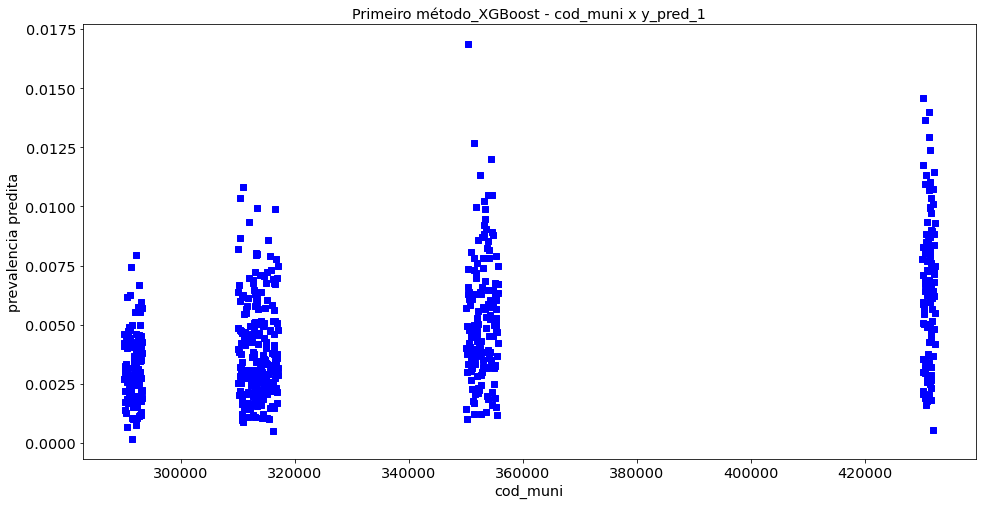

In [131]:
plt.scatter(X_test['cod_muni'], y_pred_1, c = "blue", marker = "s")
plt.title("Primeiro método_XGBoost - cod_muni x y_pred_1")
plt.xlabel("cod_muni")
plt.ylabel("prevalencia predita")
plt.show()

In [120]:
erro1 = y_test - y_pred_1

In [123]:
erperc1 = 1-(y_pred_1/y_test)

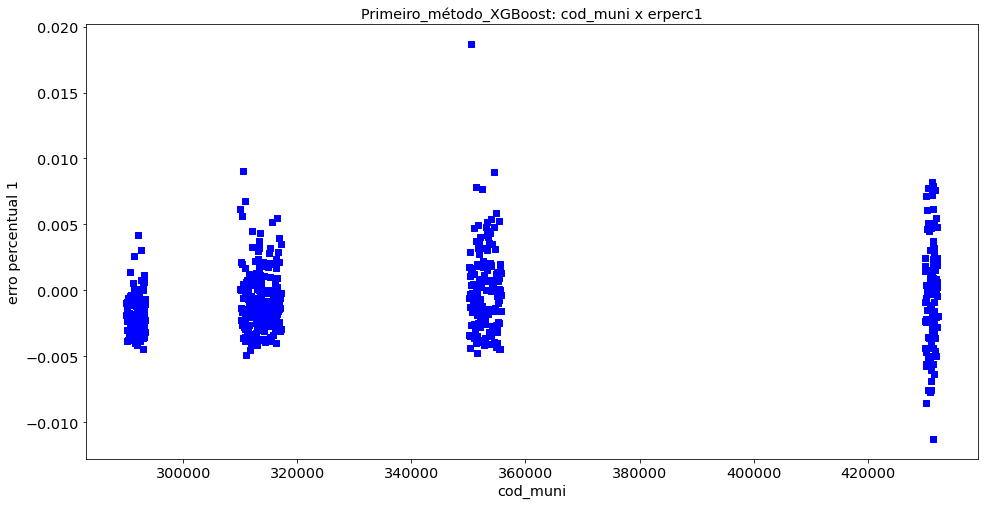

In [124]:
plt.scatter(X_test['cod_muni'], erro, c = "blue", marker = "s")
plt.title("Primeiro_método_XGBoost: cod_muni x erperc1")
plt.xlabel("cod_muni")
plt.ylabel("erro percentual 1")
plt.show()

### Segundo método XGBoost

In [66]:
# https://www.kaggle.com/pablocastilla/predict-house-prices-with-xgboost-regression

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict

In [68]:
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [69]:
model.fit(X_train,y_train)

C:\Users\aferr\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[17:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [70]:
#for tuning parameters
#parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
#}

                    
#xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

#gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')#gsearch1.fit(train_x,train_y)
#print (gsearch1.grid_scores_)
#print('best params')
#print (gsearch1.best_params_)
#print('best score')
#print (gsearch1.best_score_)

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

[17:26:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [71]:
y_pred_2 = best_xgb_model.predict(X_test)

In [72]:
mean_squared_error(y_test, y_pred_2)

8.811035687023031e-06

In [73]:
y_pred_2

array([0.00530532, 0.00619557, 0.00747827, 0.00515485, 0.00522488,
       0.0050551 , 0.00435534, 0.00630584, 0.00507873, 0.00512704,
       0.00511315, 0.00623107, 0.006459  , 0.00487506, 0.00453848,
       0.00567639, 0.00466326, 0.00750428, 0.00507873, 0.0046657 ,
       0.00454798, 0.00432444, 0.00507873, 0.00697529, 0.00507873,
       0.00471959, 0.00531584, 0.00537702, 0.00440788, 0.00507873,
       0.00652805, 0.00445259, 0.00514656, 0.00626054, 0.00495762,
       0.00778428, 0.00445259, 0.00432444, 0.00515485, 0.00510964,
       0.00501689, 0.00441936, 0.00461903, 0.00507873, 0.00511712,
       0.00630584, 0.00508821, 0.00432444, 0.00459781, 0.00432444,
       0.00610173, 0.00515485, 0.00507873, 0.00519106, 0.00432444,
       0.00518686, 0.00506565, 0.00634974, 0.008046  , 0.00509614,
       0.00476241, 0.00437194, 0.00559753, 0.00440937, 0.0047217 ,
       0.00432444, 0.00454283, 0.00893769, 0.00493208, 0.00582895,
       0.00991148, 0.00506565, 0.00534299, 0.00452065, 0.00524

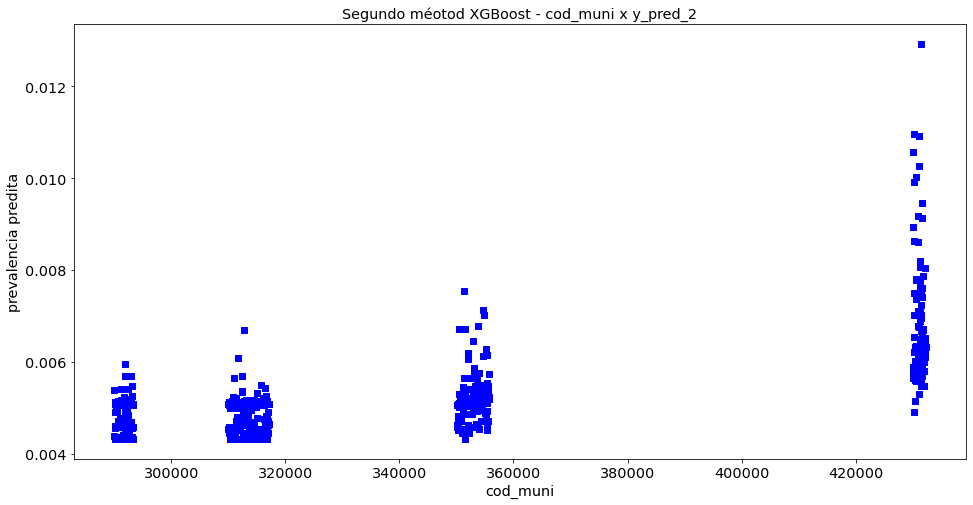

In [74]:
plt.scatter(X_test['cod_muni'], y_pred_2, c = "blue", marker = "s")
plt.title("Segundo méotod XGBoost - cod_muni x y_pred_2")
plt.xlabel("cod_muni")
plt.ylabel("prevalencia predita")
plt.show()

In [127]:
erperc2 = 1-(y_pred_2/y_test)

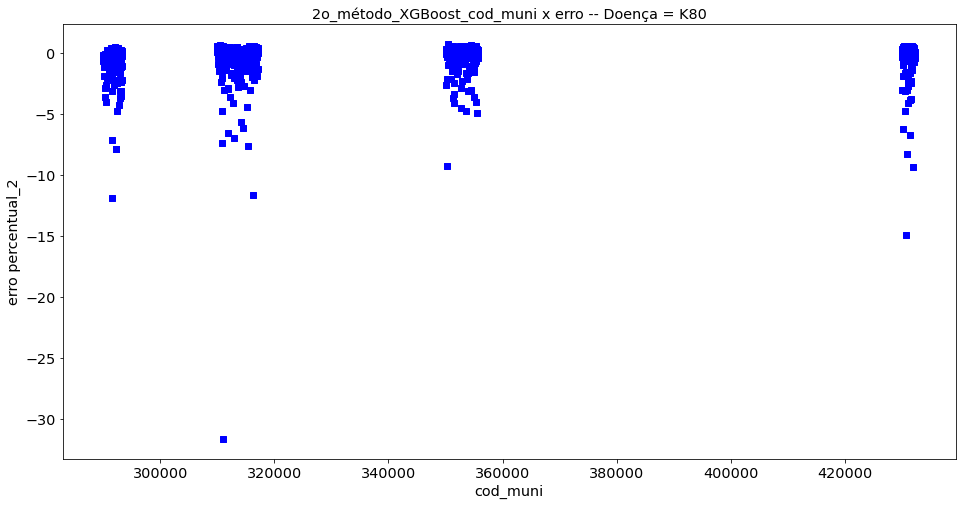

In [128]:
plt.scatter(X_test['cod_muni'], erperc2, c = "blue", marker = "s")
plt.title("2o_método_XGBoost_cod_muni x erro -- Doença = K80")
plt.xlabel("cod_muni")
plt.ylabel("erro percentual_2")
plt.show()

In [77]:
X.sample(1)

V016_domicilio01  qtd_mora  incidencia  SITU5_entorno  \
115855          0.904242     10553          55            0.0   

        V034_domicilio01  V014_domicilio01  cod_muni  V039_domicilio01  \
115855          0.043716               0.0    430230          0.021077   

        V035_domicilio01  existe_calc_entorno  SITU8_entorno  \
115855          0.735883             0.216704       0.268341   

        V042_domicilio01  V030_domicilio02  V013_domicilio01  V012_domicilio01  
115855          0.064793          0.732268          0.205569          0.659901

In [78]:
x_in=X_test.iloc[0:2,:]

In [79]:
y_pred_in = best_xgb_model.predict(x_in)

In [80]:
# predição da prevalência
y_pred_in

array([0.00530532, 0.00619557], dtype=float32)

In [81]:
X_test.head(2)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
72492     350370      8533          49          0.373224       0.947603   
138890    432210      5887          38          0.370395       0.706855   

        SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
72492        0.001858            0.0            0.0            0.0   
138890       0.000000            0.0            0.0            0.0   

        SITU6_entorno  SITU7_entorno  SITU8_entorno  V001_entorno  \
72492             0.0            0.0       0.050539           1.0   
138890            0.0            0.0       0.293145           1.0   

        existe_pav_entorno  n_existe_pav_entorno  existe_calc_entorno  \
72492             0.941657              0.001858             0.917131   
138890            0.602820              0.104035             0.353427   

        n_existe_calc_entorno  existe_mfio_entorno  n_existe_mfio_entorno  \
72492                0.026384             0.940914               0.002601   
138890               0.353427             0.605737               0.101118   

        existe_buero_entorno  n_existe_buero_entorno  existe_arbo_entorno  \
72492               0.260498                0.683018             0.932367   
138890              0.262032                0.444823             0.693243   

        n_existe_arbo_entorno  existe_esgoto_entorno  n_existe_esgoto_entorno  \
72492                0.011148                    0.0                 0.943515   
138890               0.013612                    0.0                 0.706855   

        existe_lixo_entorno  n_existe_lixo_entorno  V001_domicilio01  \
72492                   0.0               0.943515               1.0   
138890                  0.0               0.706855               1.0   

        V012_domicilio01  V013_domicilio01  V014_domicilio01  \
72492           0.906736          0.047002          0.000370   
138890          0.916586          0.047042          0.000485   

        V015_domicilio01  V016_domicilio01  V017_domicilio01  \
72492           0.041821          0.995189          0.940415   
138890          0.033463          0.995635          0.006305   

        V018_domicilio01  V019_domicilio01  V020_domicilio01  \
72492           0.012213          0.037750          0.000370   
138890          0.064986          0.838991          0.064986   

        V021_domicilio01  V022_domicilio01  V023_domicilio01  \
72492           0.003331           0.00111           0.00074   
138890          0.019399           0.00097           0.00194   

        V024_domicilio01  V034_domicilio01  V035_domicilio01  \
72492           0.994449          0.001480          0.964471   
138890          0.986906          0.010669          0.932590   

        V036_domicilio01  V037_domicilio01  V038_domicilio01  \
72492           0.957439          0.007032          0.022946   
138890          0.927255          0.005335          0.052861   

        V039_domicilio01  V040_domicilio01  V041_domicilio01  \
72492           0.002961          0.002221               0.0   
138890          0.012124          0.000000               0.0   

        V042_domicilio01  V043_domicilio01  V046_domicilio01  \
72492           0.003331          0.995189           0.00074   
138890          0.000000          0.996605           0.00097   

        V060_domicilio01  V061_domicilio01  V001_domicilio02  \
72492           0.082161          0.066987               1.0   
138890          0.123181          0.054801               1.0   

        V012_domicilio02  V013_domicilio02  V014_domicilio02  \
72492           0.905347          0.049725          0.000234   
138890          0.910478          0.052730          0.000339   

        V015_domicilio02  V016_domicilio02  V017_domicilio02  \
72492           0.043056          0.998011          0.940213   
138890          0.034588          0.996948          0.006104   

        V018_domicilio02  V019_domicilio02  V020_domicilio02  \
72492           0.013455       

In [82]:
x_in.head(2)

cod_muni  qtd_mora  incidencia  renda_media_mora  SITU1_entorno  \
72492     350370      8533          49          0.373224       0.947603   
138890    432210      5887          38          0.370395       0.706855   

        SITU2_entorno  SITU3_entorno  SITU4_entorno  SITU5_entorno  \
72492        0.001858            0.0            0.0            0.0   
138890       0.000000            0.0            0.0            0.0   

        SITU6_entorno  SITU7_entorno  SITU8_entorno  V001_entorno  \
72492             0.0            0.0       0.050539           1.0   
138890            0.0            0.0       0.293145           1.0   

        existe_pav_entorno  n_existe_pav_entorno  existe_calc_entorno  \
72492             0.941657              0.001858             0.917131   
138890            0.602820              0.104035             0.353427   

        n_existe_calc_entorno  existe_mfio_entorno  n_existe_mfio_entorno  \
72492                0.026384             0.940914               0.002601   
138890               0.353427             0.605737               0.101118   

        existe_buero_entorno  n_existe_buero_entorno  existe_arbo_entorno  \
72492               0.260498                0.683018             0.932367   
138890              0.262032                0.444823             0.693243   

        n_existe_arbo_entorno  existe_esgoto_entorno  n_existe_esgoto_entorno  \
72492                0.011148                    0.0                 0.943515   
138890               0.013612                    0.0                 0.706855   

        existe_lixo_entorno  n_existe_lixo_entorno  V001_domicilio01  \
72492                   0.0               0.943515               1.0   
138890                  0.0               0.706855               1.0   

        V012_domicilio01  V013_domicilio01  V014_domicilio01  \
72492           0.906736          0.047002          0.000370   
138890          0.916586          0.047042          0.000485   

        V015_domicilio01  V016_domicilio01  V017_domicilio01  \
72492           0.041821          0.995189          0.940415   
138890          0.033463          0.995635          0.006305   

        V018_domicilio01  V019_domicilio01  V020_domicilio01  \
72492           0.012213          0.037750          0.000370   
138890          0.064986          0.838991          0.064986   

        V021_domicilio01  V022_domicilio01  V023_domicilio01  \
72492           0.003331           0.00111           0.00074   
138890          0.019399           0.00097           0.00194   

        V024_domicilio01  V034_domicilio01  V035_domicilio01  \
72492           0.994449          0.001480          0.964471   
138890          0.986906          0.010669          0.932590   

        V036_domicilio01  V037_domicilio01  V038_domicilio01  \
72492           0.957439          0.007032          0.022946   
138890          0.927255          0.005335          0.052861   

        V039_domicilio01  V040_domicilio01  V041_domicilio01  \
72492           0.002961          0.002221               0.0   
138890          0.012124          0.000000               0.0   

        V042_domicilio01  V043_domicilio01  V046_domicilio01  \
72492           0.003331          0.995189           0.00074   
138890          0.000000          0.996605           0.00097   

        V060_domicilio01  V061_domicilio01  V001_domicilio02  \
72492           0.082161          0.066987               1.0   
138890          0.123181          0.054801               1.0   

        V012_domicilio02  V013_domicilio02  V014_domicilio02  \
72492           0.905347          0.049725          0.000234   
138890          0.910478          0.052730          0.000339   

        V015_domicilio02  V016_domicilio02  V017_domicilio02  \
72492           0.043056          0.998011          0.940213   
138890          0.034588          0.996948          0.006104   

        V018_domicilio02  V019_domicilio02  V020_domicilio02  \
72492           0.013455       

In [83]:
y_test

72492     0.005742
138890    0.006455
130280    0.012607
73827     0.004953
81284     0.004980
            ...   
47761     0.003017
91450     0.006331
135629    0.011477
125135    0.003413
45912     0.002637
Name: prevalencia, Length: 602, dtype: float64